### aim: 

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [4]:
def make_yearlist_ERA(yrst, yrend):
    
    baseDir = '/gpfs/data/greenocean/software/products/windsFromComponents/ERA5_v202303_rawdat/daily'

    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/ERA5_y{yrs[i]}_wspd10m_mon_rg.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

def make_yearlist_UKESM(yrst, yrend):
    
    baseDir = '//gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/daily/'

    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/UKESM_1A_y{yrs[i]}_wspd10m_mon_rg.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist


ylist_UKESM = xr.open_mfdataset(make_yearlist_UKESM(1940,2019))
ylist_ERA = xr.open_mfdataset(make_yearlist_ERA(1940,2019))

In [5]:
cdomask = xr.open_dataset('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/PlankTOMmask_krg.nc')
tmask = cdomask.aream2.mean(dim = 'time_counter')

# ukesm_winds = ylist_UKESM.wspd10m.groupby('time_counter.month').mean()\
# .weighted(tmask).isel(lat = slice(0,60)).mean(dim = ['lon','lat']).values
# print(ukesm_winds)
UKESM_latseas = np.zeros([6,12])
ERA_latseas = np.zeros([6,12])
for i in range(0,6):
    print(i)
    UKESM_latseas[i,:]  = ylist_UKESM.wspd10m.groupby('time_counter.month').mean()\
    .isel(lat = slice((i*10),((i+1)*10))).weighted(tmask.isel(lat = slice(0,60))).mean(dim = ['lat','lon']).values

    ERA_latseas[i,:] = ylist_ERA.wspd10m.groupby('time_counter.month').mean()\
    .isel(lat = slice((i*10),((i+1)*10))).weighted(tmask.isel(lat = slice(0,60))).mean(dim = ['lon','lat',]).values


0
1
2
3
4
5


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


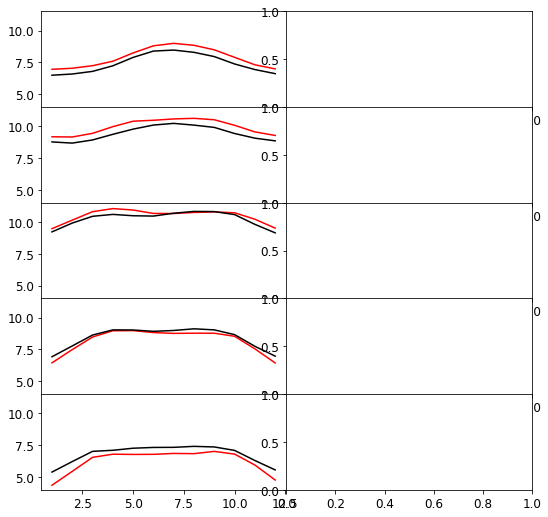

In [6]:


fact = 1.1
fig, axs = plt.subplots(5,2, figsize=(8*fact, 8*fact), facecolor='w', edgecolor='k',\
                    gridspec_kw = {'wspace':0, 'hspace':0})
axs = axs.ravel()
for i in range(0,5):
    axs[i*2].plot(np.arange(1,13,1),UKESM_latseas[6-i-1,:],color = 'r')
    axs[i*2].plot(np.arange(1,13,1),ERA_latseas[6-i-1,:],color = 'k')
# for ax in axs.flatten():
    axs[i*2].set_ylim([4,11.5])
    
#     ax
#     ax.set_xticklabels([])
#     ax.set_yticklabels([])

In [8]:
def make_yearlist_ERA(yrst, yrend):
    
    baseDir = '/gpfs/data/greenocean/software/products/windsFromComponents/ERA5_v202303_rawdat/daily'

    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/ERA5_y{yrs[i]}_wspd10m_seas_rg.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

def make_yearlist_UKESM(yrst, yrend):
    
    baseDir = '//gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/daily/'

    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/UKESM_1A_y{yrs[i]}_wspd10m_seas_rg.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist


ylist_UKESM = xr.open_mfdataset(make_yearlist_UKESM(1940,2019))
ylist_ERA = xr.open_mfdataset(make_yearlist_ERA(1940,2019))

In [24]:
cdomask = xr.open_dataset('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/PlankTOMmask_krg.nc')
tmask = cdomask.aream2.mean(dim = 'time_counter')

In [25]:
tmask

<xarray.DataArray 'aream2' (lat: 180, lon: 360)>
array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [8.5022971e+09, 8.5041623e+09, 8.5059748e+09, ..., 8.4907699e+09,
        8.4976492e+09, 8.5003822e+09],
       [8.1228324e+09, 8.1269038e+09, 8.1309773e+09, ..., 8.1106284e+09,
        8.1146926e+09, 8.1187630e+09],
       [7.7222518e+09, 7.7231959e+09, 7.7241411e+09, ..., 7.7194194e+09,
        7.7203615e+09, 7.7213046e+09]], dtype=float32)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

In [35]:
y1 = 1940; y2 = 1950

def ukesm_line(y1,y2, tseas = 'DJF', tylist = ylist_UKESM):
    twi = tylist.wspd10m.sel(time_counter=slice(f'{y1}-01-01', f'{y2}-01-01'))
    twi = twi.sel(time_counter=(twi['time_counter.season'] == tseas)).\
    isel(lat = slice(0,60)).weighted(tmask.isel(lat=slice(0,60))).mean(dim = ['lon']).mean(dim = ['time_counter'])
    return twi

Text(0.5, 0, '10m wind speed (m s$^{-1}$)')

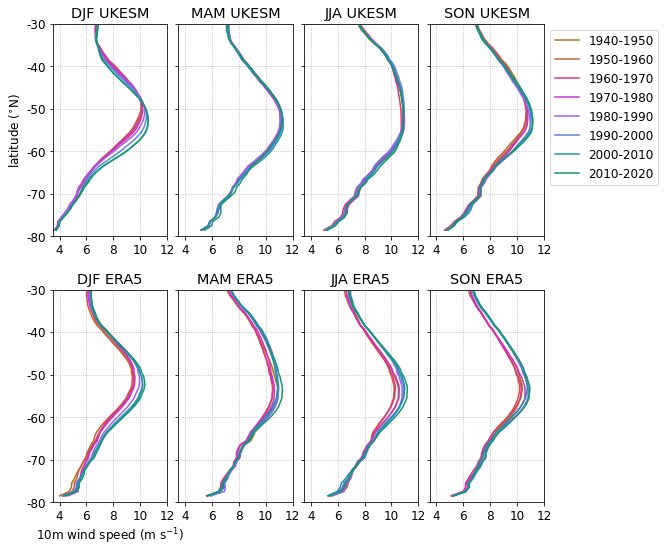

In [68]:
tcm = cm.phase
    
fact = 1.1
fig, axs = plt.subplots(2,4, figsize=(8*fact, 8*fact), facecolor='w', edgecolor='k',\
                    gridspec_kw = {'wspace':0.1, 'hspace':0.25})
axs = axs.ravel()

ttit = ['DJF UKESM', 'MAM UKESM', 'JJA UKESM', 'SON UKESM',\
       'DJF ERA5', 'MAM ERA5', 'JJA ERA5', 'SON ERA5']
for i in range(0,8):
    
    tdec = 1940+i*10
    twi = ukesm_line(tdec,tdec+10, 'DJF', ylist_UKESM)
    axs[0].plot(twi, twi.lat, color = tcm(1.*(i)/9))
    twi = ukesm_line(tdec,tdec+10, 'MAM', ylist_UKESM)
    axs[1].plot(twi, twi.lat, color = tcm(1.*(i)/9))
    twi = ukesm_line(tdec,tdec+10, 'JJA', ylist_UKESM)
    axs[2].plot(twi, twi.lat, color = tcm(1.*(i)/9))
    twi = ukesm_line(tdec,tdec+10, 'SON', ylist_UKESM)
    axs[3].plot(twi, twi.lat, color = tcm(1.*(i)/9), label = f'{tdec}-{tdec+10}')

    twi = ukesm_line(tdec,tdec+10, 'DJF', ylist_ERA)
    axs[0+4].plot(twi, twi.lat, color = tcm(1.*(i)/9))
    twi = ukesm_line(tdec,tdec+10, 'MAM', ylist_ERA)
    axs[1+4].plot(twi, twi.lat, color = tcm(1.*(i)/9))
    twi = ukesm_line(tdec,tdec+10, 'JJA', ylist_ERA)
    axs[2+4].plot(twi, twi.lat, color = tcm(1.*(i)/9))
    twi = ukesm_line(tdec,tdec+10, 'SON', ylist_ERA)
    axs[3+4].plot(twi, twi.lat, color = tcm(1.*(i)/9))
    
for i in range(0,8):
    axs[i].set_yticks([])
    axs[i].set_ylim([-80,-30])
    axs[i].set_xlim([3.5,11.5])
    axs[3].legend(bbox_to_anchor = [1,1])
    
for i in range(0,8):
    axs[i].set_xticks(np.arange(4,14,2))
    axs[i].set_yticks(np.arange(-80,-20,10))
    axs[i].set_yticklabels([])
    axs[i].set_title(ttit[i])
    axs[i].grid(linestyle = ':')
axs[0].set_yticklabels(np.arange(-80,-20,10))
axs[4].set_yticklabels(np.arange(-80,-20,10))
axs[0].set_ylabel('latitude ($^{\circ}$N)')
axs[4].set_xlabel('10m wind speed (m s$^{-1}$)')